# Whipping in Da 'Burgh
**Conor McGir, Drew Whiteside, Ryan Durstewitz**

### Directions for the Project

The datasets we are looking was to see which neighborhood in Pittsburgh is the best place to drive through. Each of us took on a different idea that we thought was important when looking at driving.

**Conor** - looked at the traffic counts of each neighborhood

**Ryan** - looked at the median speed of each neighborhood

**Drew** - looked at parking though parking meters and NO PARKING signs

*Why we picked this*
We felt that while yes there is public transit in the city, sometimes its more efficent to drive and not all of us want to be victim to the sometimes unreliable Port Authority Bus system.

### The Metric

Looking at our datasets we felt we would indivdually work on them and then come up with our score. Taking the scores from each neighborhood and then we would weigh them equally to find truly what the best neighborhood to drive through is.


### Traffic Counts of Every Neighborhood

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
dfT= pd.read_csv("6dfd4f8f-cbf5-4917-a5eb-fd07f4403167.csv")
dfT.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


### Where I was headed

Afte loading in the .csv file. It was pretty large so I needed a better picture of it so I could have more direction with what I wanted to do. I knew I wanted to focus on traffic in each neighborhood so I will have to pretty much ignore every other column outside of neighborhood and average_daily_car_traffic. Since this data set is from 2017 to 2021 and it would be quite noisy I decided I wanted to get the average in each neighborhood.

In [4]:
dfT.neighborhood.value_counts()

Squirrel Hill South    28
Bloomfield             21
Shadyside              18
Highland Park          16
East Liberty           16
                       ..
Allegheny Center        1
Upper Lawrenceville     1
Duquesne Heights        1
Regent Square           1
Crawford-Roberts        1
Name: neighborhood, Length: 74, dtype: int64

In [5]:
for col in dfT.columns:
    print(col)

id
device_id
record_oid
count_start_date
count_end_date
average_daily_car_traffic
average_daily_bike_traffic
counter_number
counter_type
speed_limit
max_speed
median_speed
percent_over_limit
speed85_percent
speed95_percent
longitude
latitude
neighborhood
council_district
ward
tract
public_works_division
pli_division
police_zone
fire_zone


<AxesSubplot:ylabel='Density'>

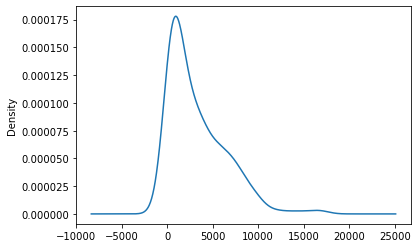

In [6]:
dfT['average_daily_car_traffic'].plot.density()

In [7]:
dfT['average_daily_car_traffic'].count()

286

In [8]:
dfT['neighborhood'].count()

418

In [9]:
dfT2 = dfT[['average_daily_car_traffic', 'neighborhood']]
dfT2.head()

,average_daily_car_traffic,neighborhood
0,4949.0,Polish Hill
1,NaN,Central Lawrenceville
2,NaN,Windgap
3,2741.0,Squirrel Hill South
4,NaN,Perry North


In [10]:
dfT3=dfT2[dfT2['average_daily_car_traffic'].notna()]
dfT3

,average_daily_car_traffic,neighborhood
0,4949.0,Polish Hill
3,2741.0,Squirrel Hill South
5,1046.0,Central Northside
7,3015.0,Polish Hill
10,5592.0,Squirrel Hill South
...,...,...
402,5605.0,Greenfield
404,809.0,Central Northside
410,910.0,Bloomfield
411,271.0,Bloomfield


### Final Destination

Now that I cleaned the data and the current data set I have is just the neighborhoods and the traffic data. I needed to group and get the mean so then I can sort and graph in an appealing way.

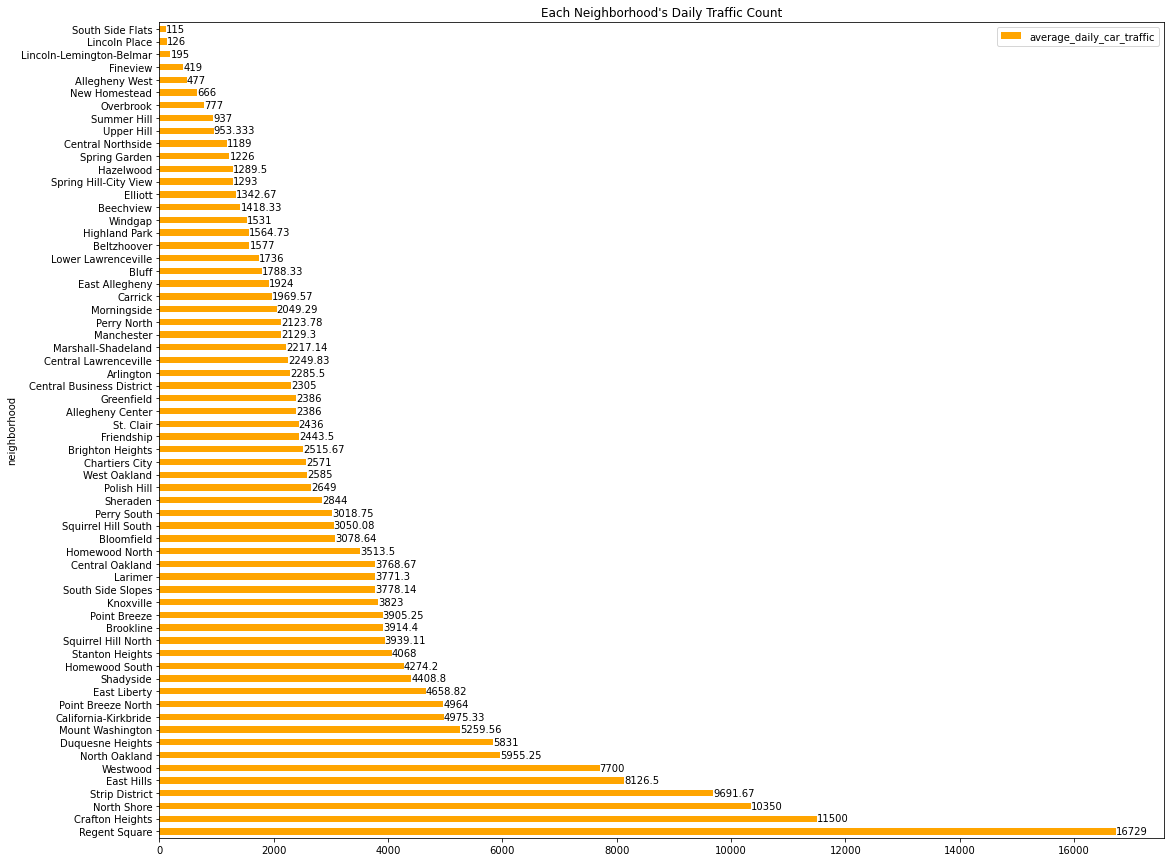

In [11]:
# Takes my dfT3 and sorts based on the traffic and groups it by the neighborhood then finds the mean 
best_hood=dfT3.sort_values(['average_daily_car_traffic','neighborhood'])\
                                   .groupby('neighborhood')\
                                   .mean()\
                                   .reset_index()


df_sorted=best_hood.sort_values('average_daily_car_traffic', ascending= False)
## graph is descending order of heaviest traffic to lightest traffic.

ax_sort = df_sorted.plot.barh(x='neighborhood', 
                         y='average_daily_car_traffic',
                        figsize=(18,15),
                       title= "Each Neighborhood's Daily Traffic Count",
                        color="orange")

#tick marks for graph
for container in ax_sort.containers:
    ax_sort.bar_label(container)

In [101]:
df_sorted['traffic_metric_value']= 1 - (df_sorted['average_daily_car_traffic']/16729)
#df_sorted.to_csv('results-traffic.csv')
df_sorted

,neighborhood,average_daily_car_traffic,traffic_metric_value
47,Regent Square,16729.000000,0.000000
16,Crafton Heights,11500.000000,0.312571
40,North Shore,10350.000000,0.381314
58,Strip District,9691.666667,0.420667
19,East Hills,8126.500000,0.514227
...,...,...,...
1,Allegheny West,477.000000,0.971487
22,Fineview,419.000000,0.974954
32,Lincoln-Lemington-Belmar,195.000000,0.988344
31,Lincoln Place,126.000000,0.992468


## Conclusion for Traffic Count

Based on the traffic count data. I think that *South Side Flats* would be the best (most accessible) neighborhood to have a car in. Compared to Regent Square where you would be getting a taste of New York City with the traffic you would be sitting it. If you live in Regent Square it might be best to get a bike or rely on Port Authority Bus.

---
---
---

### Median Speed of Every Neighborhood

In [71]:
import matplotlib.pyplot as plt 
import pandas as p

df = p.read_csv("6dfd4f8f-cbf5-4917-a5eb-fd07f4403167.csv")

In [72]:
df2 = df[["median_speed", "neighborhood"]]
df3 = df2.dropna()
df4 = df3.sort_values(["median_speed"])\
                        .groupby('neighborhood')\
                        .mean()\
                        .reset_index()
df4_sorted=df4.sort_values('median_speed', ascending = False)

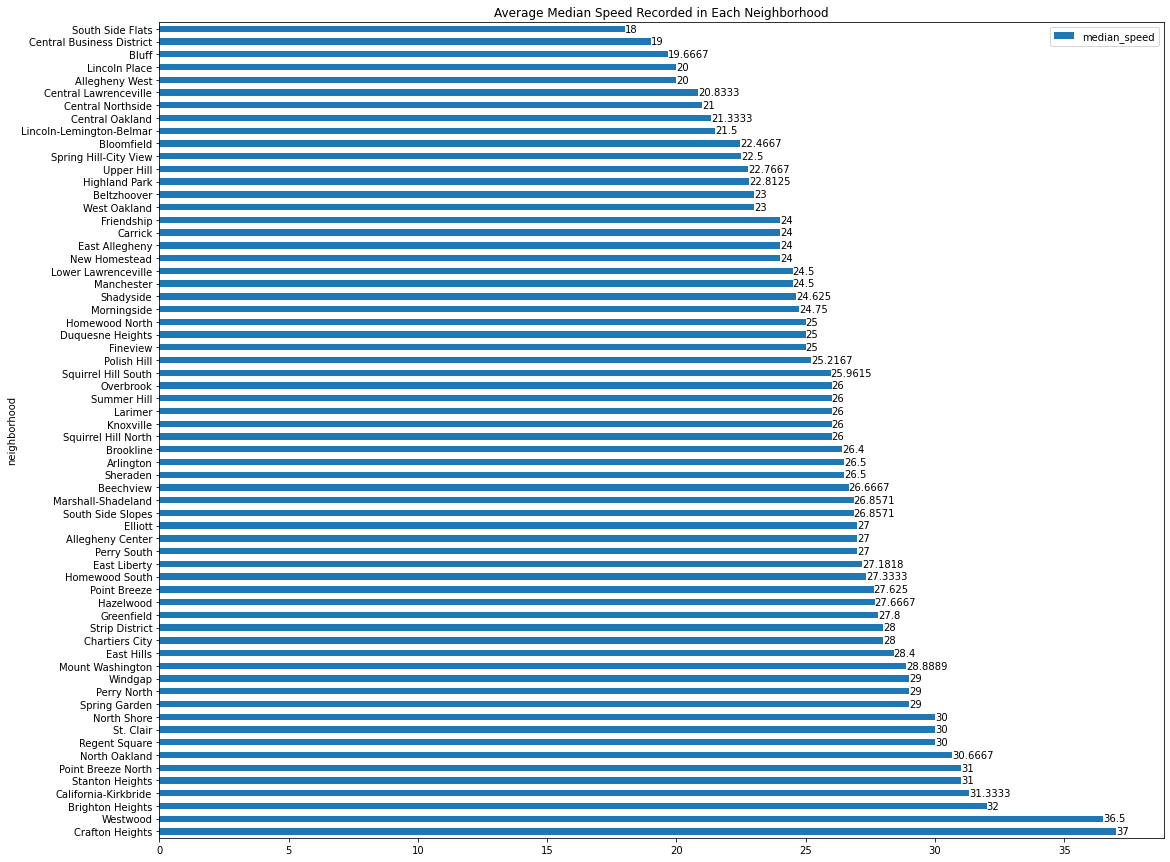

In [73]:
ax_sort = df4_sorted.plot.barh(x = "neighborhood", y = "median_speed", figsize = (18,15), title = "Average Median Speed Recorded in Each Neighborhood")

for container in ax_sort.containers:
    ax_sort.bar_label(container)

In [96]:
df4['median_speed'] = df4['median_speed'].astype(int)
df4['median_speed_score'] = 18 / df4['median_speed']
df4.sort_values('median_speed_score', ascending=False, inplace=True)
#df4.to_csv('results-speeding.csv')
df4.head()

,neighborhood,median_speed,median_speed_score
50,South Side Flats,18,1.000000
11,Central Business District,19,0.947368
6,Bluff,19,0.947368
12,Central Lawrenceville,20,0.900000
31,Lincoln Place,20,0.900000


## CONCLUSION
In conclusion, based on the data, we can see that South Side Flats has the lowest median speed out of all the neighboorhoods in Pittsburgh making it one of the safer neighboorhoods to drive in. 

### Parking Meters and NO PARKING Signs of Every Neighborhood

The datasets I used were 1. parking meters in Pittsburgh, and 2. street signs in Pittsburgh, of which I used only signs that had "no parking" on them.  

I decided that more parking meters = better and less "no parking" signs = better.

1) __Parking Meters__

In [115]:
df = pd.read_csv('parking_meters_rates.csv')

I cleaned the data by only selecting the "active meters" and the ones that were "on street."  I also edited the zone names to make them only have the actual name of the neighborhood.  Then, I only took the zone and rate columns because I didn't need anything else.

Finally, I did a bit of mapping of neighborhoods to consolidate them.  There were Oakland 1,2,3,4, so I needed to rename them to what they actually meant.  I combined the 2 downtown zones.

In [116]:
only_active = df[df['status'] == 'Active']
active_on_streets = only_active[only_active['location_type'] == 'On street']

for index, row in active_on_streets.iterrows():
    
    new_name = row['zone'].split(' - ')[1]
    active_on_streets.at[index,'zone'] = new_name

In [117]:
active_on_streets_min = active_on_streets[['zone', 'rate']]

In [118]:
zones_dic = {
    
    'Downtown 2' : 'Downtown',
    'Downtown 1' : 'Downtown',
    'Oakland 1' : 'South Oakland',
    'Oakland 2' : 'Pitt Campus Oakland', #Pitt campus
    'Oakland 3' : 'North Oakland',
    'Oakland 4' : 'Central Oakland',
    'SS & SSW' : 'South Side',
}

rates_dic = {
    '$1.50/hr' : 1.5,
    '$1/hr' : 1,
    '$3/hr' : 3,
    '$4/hr' : 4,
    '$.50/hr' :  0.5,
    '$2.50/hr' : 2.5,
    '$1.50($2 after 2pm)/hr' : 1.5,
    '$3($2.50 after 2pm)/hr' : 3,
    '$1.75/hr' : 1.75,
    '$2/hr' : 2,
    
}

combined_df = active_on_streets_min
combined_df['zone'].replace(zones_dic, inplace=True)
combined_df = combined_df[combined_df.rate != 'Multi-Rate']
combined_df['rate'].replace(rates_dic, inplace=True)

C:\Users\drewa\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [119]:
meter_counts = combined_df.groupby('zone')['rate'].count()
rate_averages = combined_df.groupby('zone')['rate'].mean()


In [149]:
new_df = pd.DataFrame(list(zip(meter_counts.keys(), meter_counts, rate_averages)), columns=['neighborhood', 'num_meters', 'rate_average'])
new_df['meters_div_rate'] = new_df['num_meters'] / new_df['rate_average']
new_df.sort_values(by='num_meters', inplace=True)

Making a bar graph to show the most number of parking meters by neighborhood:

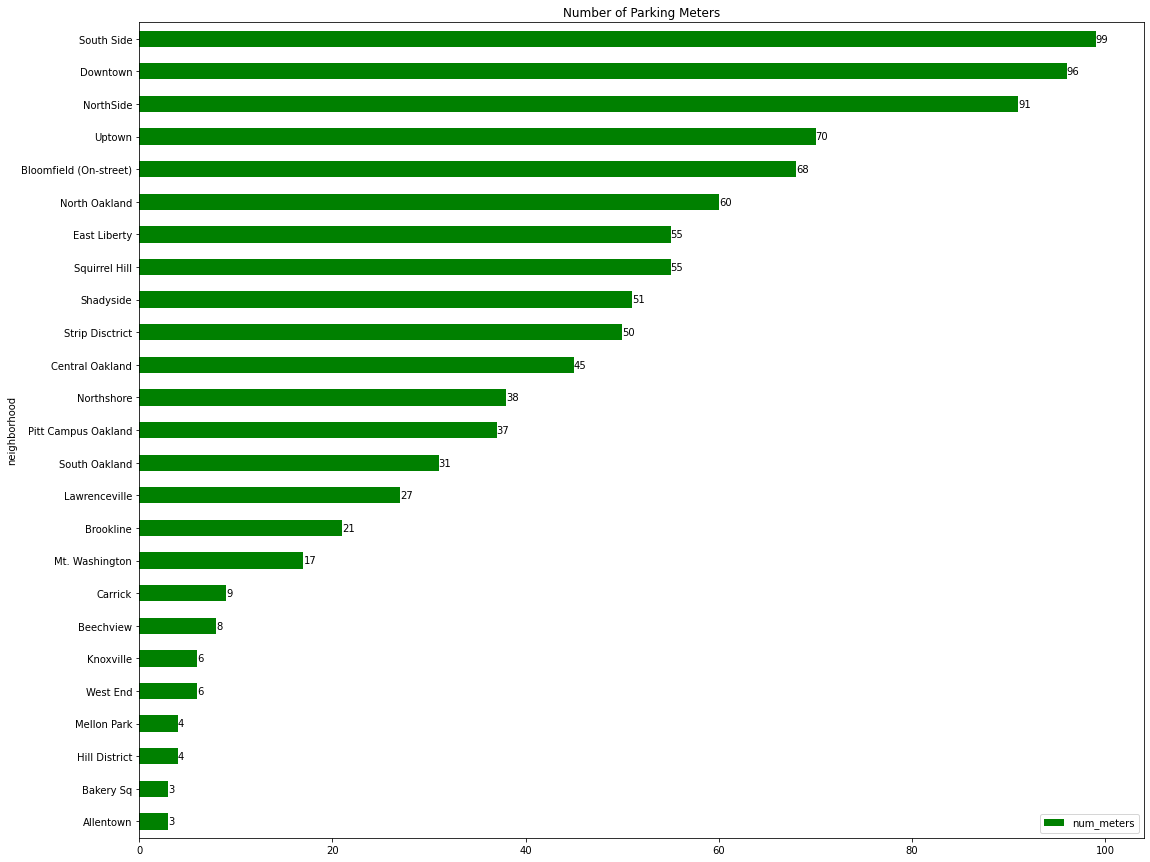

In [153]:
ax = new_df.plot.barh(x='neighborhood', y='num_meters', figsize=(18,15), title='Number of Parking Meters', color='green')

for container in ax.containers:
    ax.bar_label(container)

In [122]:
new_df['score'] = new_df['num_meters'] / 99
new_df.sort_values(by='score', inplace=True, ascending=False)
#new_df.to_csv('results-meters.csv')
new_df

,neighborhood,num_meters,rate_average,meters_div_rate,score
20,South Side,99,1.500000,66.000000,1.000000
7,Downtown,96,4.000000,24.000000,0.969697
15,NorthSide,91,1.000000,91.000000,0.919192
23,Uptown,70,1.500000,46.666667,0.707071
3,Bloomfield (On-street),68,1.000000,68.000000,0.686869
14,North Oakland,60,3.000000,20.000000,0.606061
8,East Liberty,55,1.500000,36.666667,0.555556
21,Squirrel Hill,55,1.500000,36.666667,0.555556
18,Shadyside,51,1.500000,34.000000,0.515152
22,Strip Disctrict,50,1.500000,33.333333,0.505051


**Parking Meters Conclusion**

South Side had the most parking meters out of all the neighborhoods with 99.  Allentown had the least with 3.

2) __No-Parking Signs__

In [27]:
signs = pd.read_csv('signs.csv')
signs = signs[['description', 'neighborhood']]


In [28]:
no_parking = signs['description'].str.contains('No Parking')
no_parking_counts = signs.groupby('neighborhood')['description'].count().sort_values()

In [146]:
parking_df = pd.DataFrame(list(zip(no_parking_counts.keys(), no_parking_counts)), columns=['neighborhood', 'num_no_parking_signs'])

parking_df.sort_values('num_no_parking_signs', ascending=False, inplace=True)

Making a bar graph to show the most number of no-parking signs by neighborhood:

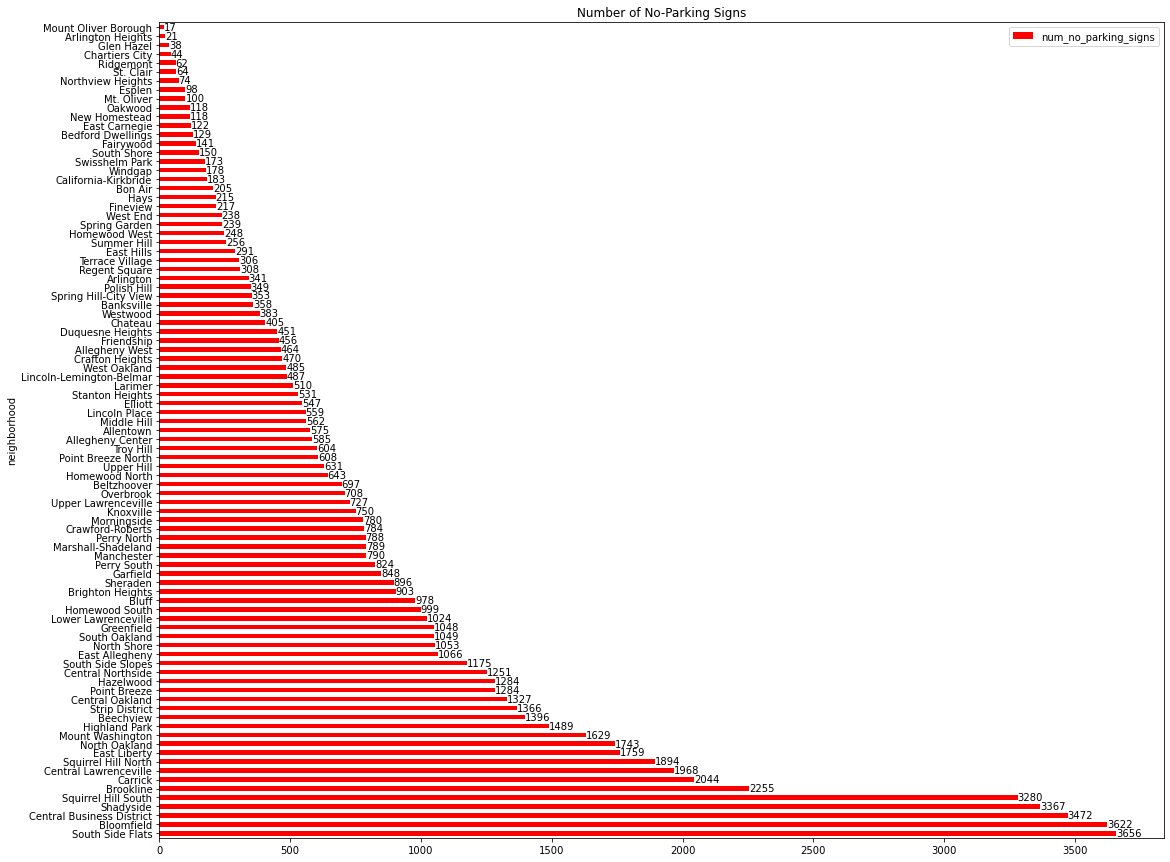

In [154]:
ax = parking_df.plot.barh(x='neighborhood', y='num_no_parking_signs', figsize=(18,15), title='Number of No-Parking Signs', color='red')

for container in ax.containers:
    ax.bar_label(container)

In [61]:
parking_df['parking_sign_score'] = 1 - parking_df['num_no_parking_signs']/3656
#parking_df.to_csv('results-parking-signs.csv')
parking_df

,neighborhood,num_no_parking_signs,parking_sign_score
0,Mount Oliver Borough,17,0.995350
1,Arlington Heights,21,0.994256
2,Glen Hazel,38,0.989606
3,Chartiers City,44,0.987965
4,Ridgemont,62,0.983042
...,...,...,...
86,Squirrel Hill South,3280,0.102845
87,Shadyside,3367,0.079048
88,Central Business District,3472,0.050328
89,Bloomfield,3622,0.009300


**No-Parking Signs Conclusion**

Mount Oliver Borough had the least amount of no-parking signs with 17.  South Side Flats had the most with 3656.

### Final Score

In [20]:
import pandas as pd

In [138]:
lst=  [
    #traffic, median speed, parking meters, no-parking signs
    ['South Side Flats', .99, 1.0, 1.0, .00],
    ['Downtown', .86, .94, .97, .05 ],
    ['Bloomfield', .85, .82, .69, .01],
    ['Central Northside', .93, .86, .92, .66],
    ['Bluff', .89, .95, .71, .73],
    ['Squirrel Hill South', .82, .72, .56, .10],
    ['Squirrel Hill North', .76, .69, .56, .48], 
    ['Mount Washington', .69, .64, .17, .55],
    ['Central Oakland', .77, .86, .45, .64],
    ['North Oakland', .64, .60, .61, .52],
    ['Beechview', .92, .69, .08, .62],
    ['East Liberty', .72, .67, .56, .52],
    ['South Side Slopes', .77, .69, 1.0, .68],
]


df = pd.DataFrame(lst, columns=['neighborhood', 'traffic', 'median_speed', 'meters', 'no_parking_signs'])

In [140]:
df['final_score'] = .3*(df.traffic) + .3*(df.median_speed) + .3*(df.meters) + .1*(df.no_parking_signs)
df.sort_values('final_score', inplace=True, ascending=False)
df

,neighborhood,traffic,median_speed,meters,no_parking_signs,final_score
0,South Side Flats,0.99,1.00,1.00,0.00,0.897
3,Central Northside,0.93,0.86,0.92,0.66,0.879
4,Bluff,0.89,0.95,0.71,0.73,0.838
1,Downtown,0.86,0.94,0.97,0.05,0.836
12,South Side Slopes,0.77,0.69,1.00,0.68,0.806
2,Bloomfield,0.85,0.82,0.69,0.01,0.709
8,Central Oakland,0.77,0.86,0.45,0.64,0.688
6,Squirrel Hill North,0.76,0.69,0.56,0.48,0.651
5,Squirrel Hill South,0.82,0.72,0.56,0.10,0.640
11,East Liberty,0.72,0.67,0.56,0.52,0.637


### Conclusions

Within each of our python files, we ended up with values out of 1 that describe how good each neighborhood is in that metric.  Then, we took those values and applied weights to them in the above equation to get a final value that all the neighborhoods can be sorted by.  We gave 30% weight to Traffic, Median Speed, and Parking Meters, and 10% to No-Parking Signs. We made this weight adjustment because if you have a lot of parking meters, we felt you shouldn't be penalized for happening to have lots of no-parking signs.

Based on our algorithm, **South Side Flats** is the best neighborhood to drive in (score of **.897**).  It has a combination of low traffic, low median speeds, a high amount of parking meters.  While it actually has the most number of no-parking signs, it is still ranked #1 because of the small weight applied to the no-parking signs metric.  

**Central Northside** followed closely in 2nd with a score of **.879**.  It lagged slightly behind SSF in the first three categories, but it made up some ground by having significantly less no-parking signs.